### Solution for Assignment 3 of the course "Introduction to Machine Learning" at the University of Leoben.
##### Author: Fotios Lygerakis
##### Semester: SS 2022/2023

Create an abstract class “ContinuousDistribution”. The class must contain the following function definitions (not implementations)
* Data Import and Export using csv files.
* Computation of the mean based on the samples from the csv.
* Computation of the standard deviation based on the samples from the csv.
* Visualization of the distribution, the raw data or the generated samples.
* Generating/Drawing Samples from the distribution.


In [1]:
import abc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import beta

In [2]:
class ContinuousDistribution(abc.ABC):
    def __init__(self, name):
        self.name = name

    @abc.abstractmethod
    def import_data(self, filename):
        pass

    @abc.abstractmethod
    def export_data(self, filename):
        pass

    @abc.abstractmethod
    def compute_mean(self):
        pass

    @abc.abstractmethod
    def compute_std(self):
        pass

    @abc.abstractmethod
    def visualize(self):
        pass

    @abc.abstractmethod
    def generate_samples(self, n):
        pass

Implement a class “GaussDistribution”, which implements a multivariate Gaussian distribution (Equation 2.6 in the book).
* It is a child class of “ContinousDistribution”.
* Implement the functions defined in “ContinousDistribution”.
* Implement a constructor that optionally takes the dimension of the multivariate distribution.
* Implement a visualization for Multivariate Gaussians up to 3 dimensions.
* Find the empirical parameters of the distribution that created the samples in the ‘MGD.csv’ file.
* Plot the samples of the ‘MGD.csv’ file and the sample from the learned distribution in two subfigures.
* Generate visualizations of one- and two-dimensional Gaussians

**The actual mean and covariance matrix of the MGD.csv file are [1, 0, 1] and [[1, 0.5, 0.5], [0.5, 1, 0.5], [0.5, 0.5, 1]] respectively.**


In [3]:
class GaussDistribution(ContinuousDistribution):
    def __init__(self, name, dim=1, mean=None, cov=None):
        super().__init__(name)
        self.dim = dim
        self.mean = mean
        self.cov = cov
        self.data = None
        self.sampled_data = None

    def import_data(self, filename):
        self.data = pd.read_csv(filename)

    def export_data(self, filename):
        self.data.to_csv(filename, index=False)

    def compute_mean(self):
        return self.data.mean()

    def compute_std(self):
        # return the covariance matrix if the distribution is multivariate
        if self.dim > 1:
            return self.data.cov()
        return self.data.std()

    def visualize(self):
        # Plot the samples of the ‘MGD.csv’ file and the sample from the learned distribution in two separate sub-figures. add a title to each sub-figure.
        if self.dim == 1:
            data = self.sampled_data if self.sampled_data is not None else self.data
            # plot the samples
            plt.hist(data['x'], density=True, histtype='stepfilled', alpha=0.2)

            # create a grid of points
            x = np.linspace(data['x'].min(), data['x'].max(), 100)

            # plot the pdf of the distribution
            plt.plot(x, multivariate_normal.pdf(x, self.mean, self.cov))

            plt.show()
        elif self.dim == 2:
            data = self.sampled_data if self.sampled_data is not None else self.data
            # create a grid of points
            x = np.linspace(data['x'].min(), data['x'].max(), 100)
            y = np.linspace(data['y'].min(), data['y'].max(), 100)

            # plot the pdf of the distribution
            X, Y = np.meshgrid(x, y)
            pos = np.empty(X.shape + (2,))
            pos[:, :, 0] = X
            pos[:, :, 1] = Y
            rv = multivariate_normal(self.mean, self.cov)
            plt.contourf(X, Y, rv.pdf(pos))
            # plot the samples
            plt.scatter(data['x'], data['y'], c='r', marker='o')
            plt.show()
        elif self.dim == 3:
            fig = plt.figure()
            ax = fig.add_subplot(121, projection='3d')
            ax.set_title('Original Data')
            ax.scatter(self.data['x'], self.data['y'], self.data['z'], c='r', marker='o')
            ax.set_xlabel('X Label')
            ax.set_ylabel('Y Label')
            ax.set_zlabel('Z Label')
            ax = fig.add_subplot(122, projection='3d')
            ax.set_title('Sampled Data')
            ax.scatter(self.sampled_data['x'], self.sampled_data['y'], self.sampled_data['z'], c='b', marker='o')
            ax.set_xlabel('X Label')
            ax.set_ylabel('Y Label')
            ax.set_zlabel('Z Label')
            plt.show()

    def generate_samples(self, n):
        # generate samples from the distribution
        if self.dim == 1:
            self.sampled_data = pd.DataFrame(np.random.normal(self.mean, self.cov, n), columns=['x'])
        elif self.dim == 2:
            self.sampled_data = pd.DataFrame(np.random.multivariate_normal(self.mean, self.cov, n), columns=['x', 'y'])
        elif self.dim == 3:
            self.sampled_data = pd.DataFrame(np.random.multivariate_normal(self.mean, self.cov, n), columns=['x', 'y', 'z'])

    def fit(self):
        self.mean = self.compute_mean()
        self.cov = self.compute_std()

Find the empirical parameters of the distribution that created the samples in the ‘MGD.csv’ file.

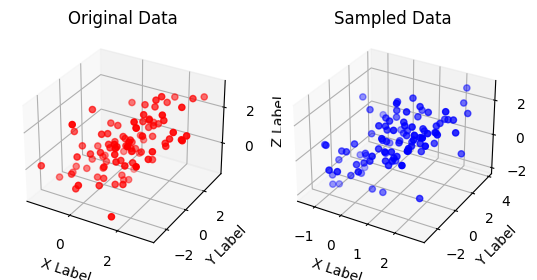

x    0.984026
y    0.008833
z    0.860115
dtype: float64
          x         y         z
x  0.957077  0.652484  0.563223
y  0.652484  1.420160  0.753830
z  0.563223  0.753830  1.255599


In [4]:
gd = GaussDistribution('MGD', 3)
gd.import_data('MGD.csv')
gd.fit()
gd.generate_samples(100)
gd.visualize()
# print the mean and covariance matrix of the distribution
print(gd.mean)
print(gd.cov)

Generate visualizations of one- and two-dimensional Gaussians using the above class.

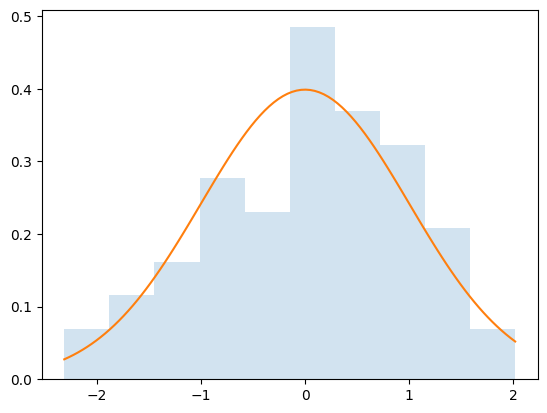

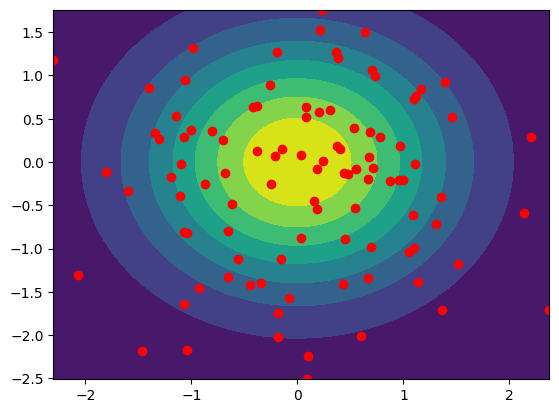

In [5]:
gd = GaussDistribution('1D', dim=1, mean=0, cov=1)
gd.generate_samples(100)
gd.visualize()

gd = GaussDistribution('2D', dim=2, mean=[0, 0], cov=[[1, 0], [0, 1]])
gd.generate_samples(100)
gd.visualize()

Implement a class “BetaDistribution” (Equation 2.5 in the book)
* It is also a child class of “ContinousDistribution”.
* It’s purpose is to generate beta distributed samples and plot the distribution giving the parameters a and b.
* The contractor should take the parameters a and b as arguments.
* Implement a visualization for Beta distributions, including the mean and the standard deviation lines.

In [6]:
class BetaDistribution(ContinuousDistribution):
    def __init__(self, name, a, b):
        super().__init__(name)
        self.a = a
        self.b = b
        self.data = None
        self.sampled_data = None

    def import_data(self, filename):
        pass

    def export_data(self, filename):
        self.sampled_data.to_csv(filename, index=False)

    def compute_mean(self):
        pass

    def compute_std(self):
        pass

    def visualize(self):
        # Plot the distribution of the beta distribution
        x = np.linspace(0, 1, 100)
        y = beta.pdf(x, self.a, self.b)
        plt.plot(x, y)
        plt.title('Beta Distribution with a = ' + str(self.a) + ' and b = ' + str(self.b))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    def generate_samples(self, n):
        self.sampled_data = pd.DataFrame(np.random.beta(self.a, self.b, n), columns=['x'])

Generate visualizations of Beta distributions using the above class.

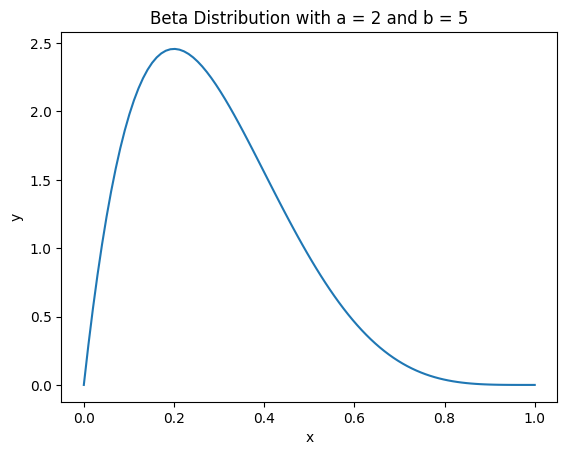

In [7]:
bd = BetaDistribution('Beta', 2, 5)
bd.generate_samples(100)
bd.visualize()